This project will look for patterns in employee exit surveys for the Departement of Eductiaon Training and Employment (DETE) and Technical and Futher Education inststitute in Queensland, Australia (TAFE). 

*Goals:*
* Reason leaving for employees who worked there for a long time against short time.
* Reasons for young employees leaving against older employees (where there's a difference from above).

In [2]:
#Using pandas (pd) and NumPy (np)
import pandas as pd
import numpy as np

#Reading the DETE csv

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

#Quick look at the data

dete_survey.info()
print(dete_survey.head(5))

tafe_survey.info()
print(tafe_survey.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [15]:
#Converting Not-Stated to NaN

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

#Removing unused columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [17]:
#Standardizing the DETE column names (lowercase, underscores, remove white space)

dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

#Standardizing the TAFE column names (renaming)

tafe_survey_updated = tafe_survey_updated.rename({
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}, axis=1)

print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

In [22]:
#Examining the unique values under 'separationtype' for each datasets

print('DETE separation values:', '\n', dete_survey_updated['separationtype'].value_counts())
print('TAFE separation values:', '\n', tafe_survey_updated['separationtype'].value_counts())

DETE separation values: 
 Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
TAFE separation values: 
 Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [26]:
#Reduce separation types in DETE data for Resignation from three values to one (that matches TAFE)
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

#Verify that this worked
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [27]:
#Including only Resignation values in a new dataframe

dete_resignations = dete_survey_updated.loc[dete_survey_updated.separationtype == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated.separationtype == 'Resignation'].copy()

In [28]:
#Reviewing  the values in cease_date

dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [29]:
#Separating out the year

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

#Check the work
dete_resignations['cease_date'].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [33]:
#Convert the year to float

dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

#Check the start and end dates for any potential issues

print('DETE Cease Dates:')
print(dete_resignations['cease_date'].value_counts().sort_index(ascending=False))

print('DETE Start Dates:')
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False))

print('TAFE Cease Dates')
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending=False))

DETE Cease Dates:
2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
DETE Start Dates:
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64
TAFE Cease Dates
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64


In [37]:
#Verified that all of the columns look correct. Creating a new column showing length of DETE service.

dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

#Check the work
dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

In [39]:
#Review 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction'

print('Contributing Factors. Dissatisfaction Values:')
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())

print('Contributing Factors. Job Dissatisfaction Values:')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

Contributing Factors. Dissatisfaction Values:
-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
Contributing Factors. Job Dissatisfaction Values:
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [42]:
#Creating a function to clean up the data in those columns so there are only True, False, or NaN

def update_vals(val):
    if pd.isnull(val) == True:
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
#Applying the method to those columns

tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

#Check the work
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [43]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                       'dissatisfaction_with_the_department',
                                                       'physical_work_environment',
                                                       'lack_of_recognition', 
                                                       'lack_of_job_security',
                                                       'work_location',
                                                       'employment_conditions', 
                                                       'work_life_balance',
                                                       'workload']
                                                     ].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Above, we created a column of dissatisfied empoloyees by filtering all of the dissatisfied response data into a single column.

In [49]:
#Creating a column in each dataframe to identify the institue before combining
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

#Combining the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

#Removing data with more than 500 null values

combined_updated = combined.dropna(thresh=500, axis=1).copy()


In [50]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [51]:
#Convert data in the column to float (with a single value for grouping)

combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

#Check the work
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [53]:
#Creating a function to group the experience level of employees

def group_values(val):
    if pd.isnull(val) == True:
        return np.nan
    elif val < 3.0:
        return 'New'
    elif val >= 3.0 and val < 7.0:
        return 'Experienced'
    elif val >= 7.0 and val < 11.0:
        return 'Established'
    elif val >= 11.0:
        return 'Veteran'

#Apply this function to create a new column from 'institute_service_up'
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(group_values)

#Check the work
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [55]:
#Determine which value is most common 
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [56]:
#Based on the most common response (satisfied) will mark all NaN responses as satisfied
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

#Check the work
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

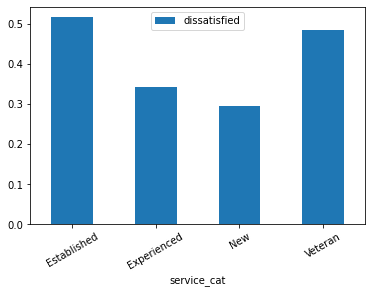

In [61]:
#Pivot tables to isolate the dissatisfied workers by length of service
combined_pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

#Plot the dataframe
%matplotlib inline
combined_pivot.plot(kind='bar', rot=30)

The longer the experience the more likely to leave becuase of dissatisfaction.